# See-through the talk

# GROUP 28: Yao Xiao, Kavya Purushothaman, Pooja Datre

### Project Overview

We will be working with data regarding TED Talks, our dataset consists of information regarding
all the audio-video recordings of TED until the 21 st of September 2018. TED is a nonpartisan
nonprofit devoted to spreading ideas, usually in the form of short, powerful talks. It began in
1984 as a conference where Technology, Entertainment, and Design converged, and today
covers almost all topics from science to business to global issues in more than 110 languages.
Meanwhile, independently run TEDx events help share ideas in communities around the world.
The dataset contains information about all talks, the various types of information it consists is
comments, description of the talk, published dates, ratings, related talks, duration of the talk,
speaker occupation, title, event year, the number of languages the talk has been published in,
URL to the talk, the theme of the talk(For eg: funny, tech-savvy, business etc.).

The reason we chose this data was that TED talks are growing and turning out to be a point of
discussion among the youth ball around the world, getting to know the insights about the
speaker, the titles, themes, etc. would give us some insights on these talks and help make them
even more successful than they’re right now. TED Talks always concentrate on some very cool
ideas and spreading them among numerous people around and create an impact in some or the
other way. We can know what people focus on, what they like and what people think about
through analyzing data about TED Talks. It will give us some fantastic details regarding this talk.

### Questions we took an attempt to answer:

● What are the topmost popular genre(top 10 to be precise), also the number of comments and views for these genre? Show it with the help of data visualization and also a word cloud.

● What is the relation between the number of comments and the number of views? Can we judge the popularioty on the basis of the combination of both? What type of correlation exists?

● Does putting out an audio-video clip in more number of languages help us get more views? Show it using a graph and find the correlation.(URL scraping is required as number of languages is not a column in our dataset.)

● What kind of words are most frequently used in  a talk? What kind of noun words are the most frequently used? Find the meaningful words using Naturla Language Processing and visualise it.

● How is the number of views changing over time? Find the change by month and also by year.(Show it using a time series, use smoothening if required.)

## Data cleaning

In [1]:
%pylab inline
import string, itertools
from collections import Counter, defaultdict
from nltk.text import Text
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from sklearn.cluster import KMeans
import requests, re
from nltk.corpus import wordnet as wn
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import datetime
import plotly.graph_objects as go
import requests
import urllib.request
from bs4 import BeautifulSoup
import numpy as np
import nltk

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''Read the CSV file we download on Kaggle.'''
TED_data = pd.read_csv('talks.csv', index_col='id')
TED_data.head()

,Unnamed: 0,comments,description,film_date,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,transcript,url,views
id,,,,,,,,,,,,,,
0,0,7,Scott Fraser studies how humans remember crime...,May 2012,Sep 2012,"['Crime', 'Global issues', 'Government', 'Law'...",['How the Mind Works'],['Bryan Stevenson: We need to talk about an in...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025
1,1,43,Want to navigate the solar system without havi...,Dec 2011,Jun 2012,"['Demo', 'Exploration', 'Science', 'Software',...",['Peering into Space'],['Carter Emmart demos a 3D atlas of the univer...,Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,"As a kid, I was fascinated with all things air...",http://www.ted.com/talks/jon_nguyen_tour_the_s...,220795
2,2,32,"During the hot summer months, watching an outd...",Apr 2012,Jun 2012,"['Entertainment', 'Environment', 'Global issue...","['Design That Matters', 'Presentation Innovati...","['Peter Diamandis: Abundance is our future', '...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,Good evening. We are in this wonderful open-ai...,http://www.ted.com/talks/wolfgang_kessling_how...,230813
3,3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,Jun 2012,"['Entertainment', 'Internet', 'Science', 'Web'...","['Master Storytellers', 'How We Learn']","['Rives: A story of mixed emoticons', 'A.J. Ja...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,"So, last month, the Encyclopaedia Britannica a...",http://www.ted.com/talks/rives_reinventing_the...,200203
4,4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,Jun 2012,"['Creativity', 'Open-source', 'Robots', 'Techn...","['Tales of Invention', 'Art Unusual']",['Kate Hartman: The art of wearable communicat...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,"So a few weeks ago, a friend of mine gave this...",http://www.ted.com/talks/massimo_banzi_how_ard...,358737


In [3]:
'''Describe the basic information of dataset'''
TED_data.shape

(1203, 14)

In [4]:
'''Get the information about data type in dataset'''
TED_data.dtypes

Unnamed: 0         int64
comments           int64
description       object
film_date         object
publish_date      object
related_tags      object
related_themes    object
related_videos    object
speaker           object
ted_event         object
title             object
transcript        object
url               object
views              int64
dtype: object

In [5]:
'''Check null value'''
TED_data.isna().sum()

Unnamed: 0        0
comments          0
description       0
film_date         0
publish_date      0
related_tags      0
related_themes    0
related_videos    0
speaker           0
ted_event         0
title             0
transcript        0
url               0
views             0
dtype: int64

In [6]:
'''Drop the meaningless columns.'''
TED_data = TED_data.drop(['Unnamed: 0'],axis=1)

In [7]:
'''Convert the datatype of column related_tags from string to list so that we could create dummy variable 
according to this variable.'''
TED_data.loc[:,'related_tags_list'] = ""
for indexs in TED_data.index:
    related_tags_list = []
    related_tags_original = TED_data.iloc[indexs].related_tags.split('\'') #Use "'" to split words in related_tags
    for i in range(len(related_tags_original)): # Extract the item whose index is odd since the format of list is ' + word + ' + word + ' ....
        if i % 2 != 0: 
            related_tags_list.append(related_tags_original[i])
    #TED_data.loc[:,'related_tags_list'] = str(related_tags_list)
    TED_data.at[indexs,'related_tags_list'] = related_tags_list # insert the value into specific cell
TED_data.head()

,comments,description,film_date,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,transcript,url,views,related_tags_list
id,,,,,,,,,,,,,,
0,7,Scott Fraser studies how humans remember crime...,May 2012,Sep 2012,"['Crime', 'Global issues', 'Government', 'Law'...",['How the Mind Works'],['Bryan Stevenson: We need to talk about an in...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,"[Crime, Global issues, Government, Law, Memory..."
1,43,Want to navigate the solar system without havi...,Dec 2011,Jun 2012,"['Demo', 'Exploration', 'Science', 'Software',...",['Peering into Space'],['Carter Emmart demos a 3D atlas of the univer...,Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,"As a kid, I was fascinated with all things air...",http://www.ted.com/talks/jon_nguyen_tour_the_s...,220795,"[Demo, Exploration, Science, Software, Space, ..."
2,32,"During the hot summer months, watching an outd...",Apr 2012,Jun 2012,"['Entertainment', 'Environment', 'Global issue...","['Design That Matters', 'Presentation Innovati...","['Peter Diamandis: Abundance is our future', '...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,Good evening. We are in this wonderful open-ai...,http://www.ted.com/talks/wolfgang_kessling_how...,230813,"[Entertainment, Environment, Global issues, In..."
3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,Jun 2012,"['Entertainment', 'Internet', 'Science', 'Web'...","['Master Storytellers', 'How We Learn']","['Rives: A story of mixed emoticons', 'A.J. Ja...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,"So, last month, the Encyclopaedia Britannica a...",http://www.ted.com/talks/rives_reinventing_the...,200203,"[Entertainment, Internet, Science, Web, Wikipe..."
4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,Jun 2012,"['Creativity', 'Open-source', 'Robots', 'Techn...","['Tales of Invention', 'Art Unusual']",['Kate Hartman: The art of wearable communicat...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,"So a few weeks ago, a friend of mine gave this...",http://www.ted.com/talks/massimo_banzi_how_ard...,358737,"[Creativity, Open-source, Robots, Technology]"


In [8]:
related_tags_dummy = TED_data['related_tags_list'].str.join(sep='*').str.get_dummies(sep='*') #Create dummy variable with the list we created before.
related_tags_dummy.head()

,AI,AIDS,Activism,Adventure,Advertising,Africa,Aging,Agriculture,Aircraft,Algorithm,...,War,Water,Web,Wikipedia,Women,Work,World cultures,Writing,Wunderkind,Youth
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
TED_data1 = pd.merge(TED_data,related_tags_dummy,on = 'id') #Merge the DataFrame of dummy variable with the original DataFrame.
TED_data1.head()

,comments,description,film_date,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,...,War,Water,Web,Wikipedia,Women,Work,World cultures,Writing,Wunderkind,Youth
id,,,,,,,,,,,,,,,,,,,,,
0,7,Scott Fraser studies how humans remember crime...,May 2012,Sep 2012,"['Crime', 'Global issues', 'Government', 'Law'...",['How the Mind Works'],['Bryan Stevenson: We need to talk about an in...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,...,0,0,0,0,0,0,0,0,0,0
1,43,Want to navigate the solar system without havi...,Dec 2011,Jun 2012,"['Demo', 'Exploration', 'Science', 'Software',...",['Peering into Space'],['Carter Emmart demos a 3D atlas of the univer...,Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,...,0,0,0,0,0,0,0,0,0,0
2,32,"During the hot summer months, watching an outd...",Apr 2012,Jun 2012,"['Entertainment', 'Environment', 'Global issue...","['Design That Matters', 'Presentation Innovati...","['Peter Diamandis: Abundance is our future', '...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,...,0,0,0,0,0,0,0,0,0,0
3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,Jun 2012,"['Entertainment', 'Internet', 'Science', 'Web'...","['Master Storytellers', 'How We Learn']","['Rives: A story of mixed emoticons', 'A.J. Ja...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,...,0,0,1,1,0,0,0,0,0,0
4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,Jun 2012,"['Creativity', 'Open-source', 'Robots', 'Techn...","['Tales of Invention', 'Art Unusual']",['Kate Hartman: The art of wearable communicat...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,...,0,0,0,0,0,0,0,0,0,0


In [10]:
TED_data.iloc[0]['publish_date'].split(' ')[1]

'2012'

In [11]:
'''Create new columns to save the year and month of film_date and publish_date'''
TED_data.loc[:,'publish_year'] = ""
TED_data.loc[:,'film_year'] = ""
TED_data.loc[:,'publish_month'] = ""
TED_data.loc[:,'film_month'] = ""
for indexs in TED_data.index:
    publish_year = TED_data.iloc[indexs].publish_date.split(' ')[1] # Split the value with space to split the year and month
    publish_month = TED_data.iloc[indexs].publish_date.split(' ')[0]
    film_year = TED_data.iloc[indexs].film_date.split(' ')[1]
    film_month = TED_data.iloc[indexs].film_date.split(' ')[0]
    TED_data.at[indexs,'publish_year'] = publish_year # Insert data into specific cell
    TED_data.at[indexs,'publish_month'] = publish_month
    TED_data.at[indexs,'film_year'] = film_year
    TED_data.at[indexs,'film_month'] = film_month
TED_data.head()

,comments,description,film_date,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,transcript,url,views,related_tags_list,publish_year,film_year,publish_month,film_month
id,,,,,,,,,,,,,,,,,,
0,7,Scott Fraser studies how humans remember crime...,May 2012,Sep 2012,"['Crime', 'Global issues', 'Government', 'Law'...",['How the Mind Works'],['Bryan Stevenson: We need to talk about an in...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,"[Crime, Global issues, Government, Law, Memory...",2012,2012,Sep,May
1,43,Want to navigate the solar system without havi...,Dec 2011,Jun 2012,"['Demo', 'Exploration', 'Science', 'Software',...",['Peering into Space'],['Carter Emmart demos a 3D atlas of the univer...,Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,"As a kid, I was fascinated with all things air...",http://www.ted.com/talks/jon_nguyen_tour_the_s...,220795,"[Demo, Exploration, Science, Software, Space, ...",2012,2011,Jun,Dec
2,32,"During the hot summer months, watching an outd...",Apr 2012,Jun 2012,"['Entertainment', 'Environment', 'Global issue...","['Design That Matters', 'Presentation Innovati...","['Peter Diamandis: Abundance is our future', '...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,Good evening. We are in this wonderful open-ai...,http://www.ted.com/talks/wolfgang_kessling_how...,230813,"[Entertainment, Environment, Global issues, In...",2012,2012,Jun,Apr
3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,Jun 2012,"['Entertainment', 'Internet', 'Science', 'Web'...","['Master Storytellers', 'How We Learn']","['Rives: A story of mixed emoticons', 'A.J. Ja...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,"So, last month, the Encyclopaedia Britannica a...",http://www.ted.com/talks/rives_reinventing_the...,200203,"[Entertainment, Internet, Science, Web, Wikipe...",2012,2012,Jun,Apr
4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,Jun 2012,"['Creativity', 'Open-source', 'Robots', 'Techn...","['Tales of Invention', 'Art Unusual']",['Kate Hartman: The art of wearable communicat...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,"So a few weeks ago, a friend of mine gave this...",http://www.ted.com/talks/massimo_banzi_how_ard...,358737,"[Creativity, Open-source, Robots, Technology]",2012,2012,Jun,Jun


In [12]:
'''Create dummy variable about publish year'''
year_dummy = pd.get_dummies(TED_data['publish_year'])
year_dummy.head()

,2006,2007,2008,2009,2010,2011,2012
id,,,,,,,
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [13]:
'''Merge DataFrame of dummy variable with original DataFrame'''
TED_data2 = pd.merge(TED_data,year_dummy,on = 'id')
TED_data2.head()

,comments,description,film_date,publish_date,related_tags,related_themes,related_videos,speaker,ted_event,title,...,film_year,publish_month,film_month,2006,2007,2008,2009,2010,2011,2012
id,,,,,,,,,,,,,,,,,,,,,
0,7,Scott Fraser studies how humans remember crime...,May 2012,Sep 2012,"['Crime', 'Global issues', 'Government', 'Law'...",['How the Mind Works'],['Bryan Stevenson: We need to talk about an in...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,...,2012,Sep,May,0,0,0,0,0,0,1
1,43,Want to navigate the solar system without havi...,Dec 2011,Jun 2012,"['Demo', 'Exploration', 'Science', 'Software',...",['Peering into Space'],['Carter Emmart demos a 3D atlas of the univer...,Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,...,2011,Jun,Dec,0,0,0,0,0,0,1
2,32,"During the hot summer months, watching an outd...",Apr 2012,Jun 2012,"['Entertainment', 'Environment', 'Global issue...","['Design That Matters', 'Presentation Innovati...","['Peter Diamandis: Abundance is our future', '...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,...,2012,Jun,Apr,0,0,0,0,0,0,1
3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,Jun 2012,"['Entertainment', 'Internet', 'Science', 'Web'...","['Master Storytellers', 'How We Learn']","['Rives: A story of mixed emoticons', 'A.J. Ja...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,...,2012,Jun,Apr,0,0,0,0,0,0,1
4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,Jun 2012,"['Creativity', 'Open-source', 'Robots', 'Techn...","['Tales of Invention', 'Art Unusual']",['Kate Hartman: The art of wearable communicat...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,...,2012,Jun,Jun,0,0,0,0,0,0,1


In [14]:
'''Change the column name to more readable form'''
TED_data=TED_data.rename(columns={'comments':'COMMENTS',
                         'description':'DESCRIPTION',
                         'film_date':'FILM DATE',
                         'publish_date':'PUBLISH DATE',
                         'related_tags':'RELATED TAGS',
                         'related_themes':'RELATED THEMES',
                         'related_videos':'RELATED VIDEOS',
                         'speaker':'SPEAKER',
                         'ted_event':'TED EVENT',
                         'title':'TITLE',
                         'transcript':'TRANSCRIPT',
                         'url':'URL',
                         'views':'VIEWS',
                         'related_tags_list':'Related Tags(List format)',
                         'publish_year':'PUBLISH YEAR',
                         'film_year':'FILM YEAR',
                         'publish_month':'PUBLISH MONTH',
                         'film_month':'FILM MONTH'
})
TED_data.head()
TED_datamerge=TED_data.reset_index()

# Data Analysis and Visualisation

### 1. We have to find the most popular genre here, i.e the most popular tag appearing in the talks will help us know this. We therefore find the count for each tag and create a dataframe and also show the top 10 popular genre in the next dataframe and also two other graphs ir order to show the number of views and comments for these genre.

In [15]:
#creating a transpose to find total numb er of talks for each genre
related_tags_dummy1=related_tags_dummy.transpose()   
col_list=related_tags_dummy1.columns
related_tags_dummy1['Total_Count'] = related_tags_dummy1[col_list].sum(axis=1)
related_tags_dummy2=related_tags_dummy.reset_index()
related_tags_dummy1.head()

id,0,1,2,3,4,5,6,7,8,9,...,1194,1195,1196,1197,1198,1199,1200,1201,1202,Total_Count
AI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
AIDS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
Activism,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,43
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
Advertising,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4


In [16]:
#creating a dataframe with topmost genre according to the number of talks in each of them
tagdf=pd.DataFrame(related_tags_dummy1['Total_Count'])
final_tagdf=tagdf.sort_values(by='Total_Count', ascending=False).head(10)
pop_gen=final_tagdf.reset_index()
pop_gen

,index,Total_Count
0,Technology,421
1,Culture,337
2,Science,323
3,Global issues,289
4,Design,265
5,Entertainment,217
6,Business,197
7,Arts,148
8,Politics,106
9,Education,103


In [17]:
total_tag_list = []
for rows_index in range(len(TED_data2)):
    row_tag_list = []
    row_rag_list_symbol = TED_data2.iloc[rows_index]['related_tags'].split('\'')
    for index in range(len(row_rag_list_symbol)):
        if (index % 2)!= 0:
            row_tag_list.append(row_rag_list_symbol[index])
    total_tag_list = total_tag_list + row_tag_list

fd = FreqDist(total_tag_list)
fd.most_common(20)



[('Technology', 421),
 ('Culture', 337),
 ('Science', 323),
 ('Global issues', 289),
 ('Design', 265),
 ('Entertainment', 217),
 ('Business', 197),
 ('Arts', 148),
 ('Politics', 106),
 ('Education', 103),
 ('Art', 95),
 ('Creativity', 88),
 ('Health', 79),
 ('Music', 75),
 ('Storytelling', 73),
 ('Biology', 73),
 ('Economics', 72),
 ('Cities', 71),
 ('Medicine', 69),
 ('Invention', 68)]

In [18]:
#creating new dataframes with total comments and views in these topmost genre
talks_views= TED_datamerge.merge(related_tags_dummy2,how='outer')
col_list=['VIEWS','Technology','Culture','Science','Global issues','Design','Entertainment','Business','Arts','Politics','Education']
t=talks_views[col_list]
t['Technology']=t['VIEWS']*t['Technology']
t['Culture']=t['VIEWS']*t['Culture']
t['Science']=t['VIEWS']*t['Science']
t['Global issues']=t['VIEWS']*t['Global issues']
t['Design']=t['VIEWS']*t['Design']
t['Entertainment']=t['VIEWS']*t['Entertainment']
t['Business']=t['VIEWS']*t['Business']
t['Arts']=t['VIEWS']*t['Arts']
t['Politics']=t['VIEWS']*t['Politics']
t['Education']=t['VIEWS']*t['Education']
col_list1=['Technology', 'Culture', 'Science','Global issues', 'Design', 'Entertainment','Business', 'Arts', 'Politics', 'Education']
t=t[col_list1]
total_views=t.transpose()
col_list2=total_views.columns
total_views['Total_Views'] = total_views[col_list2].sum(axis=1)
col_list3=['Total_Views']
total_views=total_views[col_list3]
total_views=total_views.reset_index()
col_list4=['COMMENTS','Technology','Culture','Science','Global issues','Design','Entertainment','Business','Arts','Politics','Education']
c=talks_views[col_list4]
c['Technology']=c['COMMENTS']*c['Technology']
c['Culture']=c['COMMENTS']*c['Culture']
c['Science']=c['COMMENTS']*c['Science']
c['Global issues']=c['COMMENTS']*c['Global issues']
c['Design']=c['COMMENTS']*c['Design']
c['Entertainment']=c['COMMENTS']*c['Entertainment']
c['Business']=c['COMMENTS']*c['Business']
c['Arts']=c['COMMENTS']*c['Arts']
c['Politics']=c['COMMENTS']*c['Politics']
c['Education']=c['COMMENTS']*c['Education']
col_list5=['Technology', 'Culture', 'Science','Global issues', 'Design', 'Entertainment','Business', 'Arts', 'Politics', 'Education']
c=c[col_list5]
total_comments=c.transpose()
col_list6=total_comments.columns
total_comments['Total_Comments'] = total_comments[col_list6].sum(axis=1)
col_list7=['Total_Comments']
total_comments=total_comments[col_list7]
total_comments=total_comments.reset_index()

C:\Users\kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kavya\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

In [19]:
#merging all three dataframes to have total number of talks, views and comments in each of these genre
pop_gen= pop_gen.merge(total_views,how='outer')
pop_gen= pop_gen.merge(total_comments,how='outer')
pop_gen=pop_gen.rename(columns={"index": "Genre"})
pop_gen

,Genre,Total_Count,Total_Views,Total_Comments
0,Technology,421,237878149,36427
1,Culture,337,238276168,41727
2,Science,323,188898712,32634
3,Global issues,289,146798378,30067
4,Design,265,144791086,20616
5,Entertainment,217,133550705,18888
6,Business,197,133928526,20805
7,Arts,148,70264953,11320
8,Politics,106,46472627,13232
9,Education,103,88187948,13387


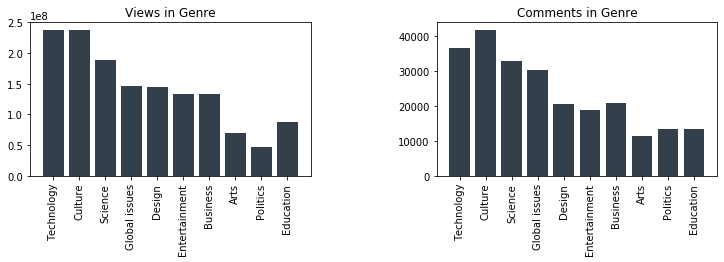

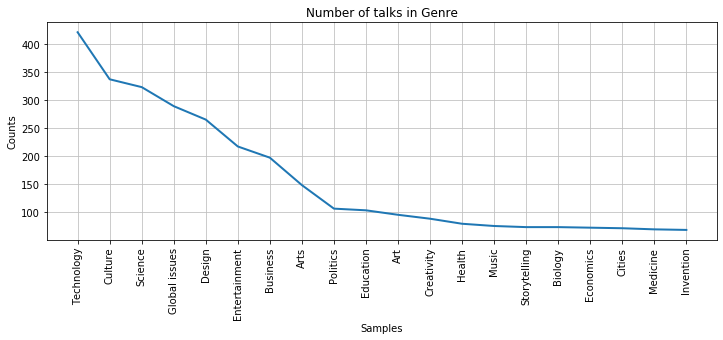

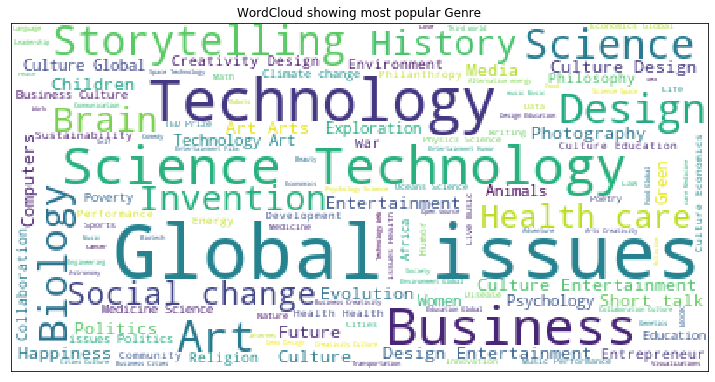

In [24]:
#plotting three graphs showing the number of talks, views and comments in each genre
plt.figure(1)

#1
plt.subplot2grid((2,2), (0,0))
plt.title('Views in Genre')
plt.xticks(rotation='vertical')
plt.bar(x=pop_gen.Genre, height=pop_gen.Total_Views, color = '#333F4B');

#2
plt.subplot2grid((2,2), (0,1))
plt.title('Comments in Genre')
plt.xticks(rotation='vertical')
plt.bar(x=pop_gen.Genre, height=pop_gen.Total_Comments, color = '#333F4B');
plt.subplots_adjust(top=1.52, bottom=0.08, left=0.30, right=1.89, hspace=0.7,
                    wspace=0.45)

#3
plt.figure(figsize=(12,4))
plt.title('Number of talks in Genre')
fd.plot(20)

wc = WordCloud(background_color='white').generate(' '.join(total_tag_list))
plt.figure(figsize=(12.5,12.5))
plt.title('WordCloud showing most popular Genre')
plt.xticks([])
plt.yticks([])
plt.imshow(wc);

plt.show()


We found out the most popular genre is 'Technology', we also found the nine popular genre after this. This tells us what talks are popular today, the number of talks of these genre are the ones which happen most frequently. We also found out the total number of views and comments in each of these genre, to show whether they align with the number of talks or not. They almost do, with a little bit of variation.

### 2. What is the relation between the number of comments and the number of views?

In [25]:
#slicing a dataframe to only get two columns, i.e number of views and comments
TED_data.head()
TED_data_2=TED_data[['COMMENTS','VIEWS']]
TED_data_2.head()

,COMMENTS,VIEWS
id,,
0,7,21025
1,43,220795
2,32,230813
3,45,200203
4,43,358737


The following graph shows the correlation between the number of comments anf the number of views:


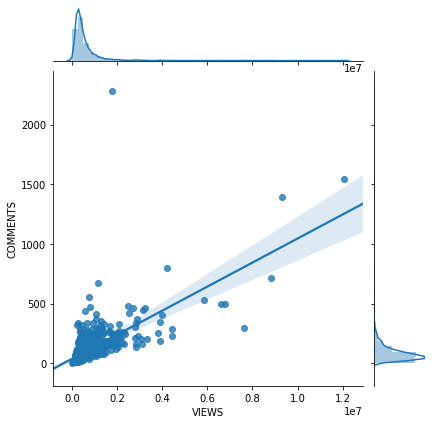

In [43]:
#plotting a scatterplot for number of views and comments
print('The following graph shows the correlation between the number of comments anf the number of views:')
print(sns.jointplot(x='VIEWS', y='COMMENTS', data=TED_data_2, kind='reg'))

In [23]:
#finding correlation between number of views and comments using three different methods
pearson_correlation = TED_data_2.corr(method="pearson")
print("Pearson correlation coefficient:")
print(pearson_correlation)
kendall_correlation = TED_data_2.corr(method="kendall")
print("Kendall Tau correlation coefficient:")
print(kendall_correlation)
spearman_correlation = TED_data_2.corr(method="spearman")
print("Spearman rank correlation:")
print(spearman_correlation)

Pearson correlation coefficient:
          COMMENTS     VIEWS
COMMENTS  1.000000  0.688491
VIEWS     0.688491  1.000000
Kendall Tau correlation coefficient:
          COMMENTS     VIEWS
COMMENTS  1.000000  0.583141
VIEWS     0.583141  1.000000
Spearman rank correlation:
          COMMENTS     VIEWS
COMMENTS  1.000000  0.776471
VIEWS     0.776471  1.000000


We are giving results on the popularity on the basic of number of talks, views and comments, we just wanted to figure out and be sure that as the views increases whether or not the comments increase as well, in order to find this we found the correlation between the number of views and comments, we have shown a scatter plot and also found the correlation usign three different methoda to be 100% sure. We found tht there exists a positive correlation between them whatever method we use.

### 3. Does the number of languages the audio-video recordings has been published in a particular year relate to the number of views?

In [24]:
TED_data.head()

,COMMENTS,DESCRIPTION,FILM DATE,PUBLISH DATE,RELATED TAGS,RELATED THEMES,RELATED VIDEOS,SPEAKER,TED EVENT,TITLE,TRANSCRIPT,URL,VIEWS,Related Tags(List format),PUBLISH YEAR,FILM YEAR,PUBLISH MONTH,FILM MONTH
id,,,,,,,,,,,,,,,,,,
0,7,Scott Fraser studies how humans remember crime...,May 2012,Sep 2012,"['Crime', 'Global issues', 'Government', 'Law'...",['How the Mind Works'],['Bryan Stevenson: We need to talk about an in...,Scott Fraser,TEDxUSC,Scott Fraser: Why eyewitnesses get it wrong,The murder happened a little over 21 years ago...,http://www.ted.com/talks/scott_fraser_the_prob...,21025,"[Crime, Global issues, Government, Law, Memory...",2012,2012,Sep,May
1,43,Want to navigate the solar system without havi...,Dec 2011,Jun 2012,"['Demo', 'Exploration', 'Science', 'Software',...",['Peering into Space'],['Carter Emmart demos a 3D atlas of the univer...,Jon Nguyen,TEDxSanDiego,Jon Nguyen: Tour the solar system from home,"As a kid, I was fascinated with all things air...",http://www.ted.com/talks/jon_nguyen_tour_the_s...,220795,"[Demo, Exploration, Science, Software, Space, ...",2012,2011,Jun,Dec
2,32,"During the hot summer months, watching an outd...",Apr 2012,Jun 2012,"['Entertainment', 'Environment', 'Global issue...","['Design That Matters', 'Presentation Innovati...","['Peter Diamandis: Abundance is our future', '...",Wolfgang Kessling,TEDxSummit,Wolfgang Kessling: How to air-condition outdoo...,Good evening. We are in this wonderful open-ai...,http://www.ted.com/talks/wolfgang_kessling_how...,230813,"[Entertainment, Environment, Global issues, In...",2012,2012,Jun,Apr
3,45,Prompted by the Encyclopaedia Britannica endin...,Apr 2012,Jun 2012,"['Entertainment', 'Internet', 'Science', 'Web'...","['Master Storytellers', 'How We Learn']","['Rives: A story of mixed emoticons', 'A.J. Ja...",Rives,TEDxSummit,Rives: Reinventing the encyclopedia game,"So, last month, the Encyclopaedia Britannica a...",http://www.ted.com/talks/rives_reinventing_the...,200203,"[Entertainment, Internet, Science, Web, Wikipe...",2012,2012,Jun,Apr
4,43,"Massimo Banzi helped invent the Arduino, a tin...",Jun 2012,Jun 2012,"['Creativity', 'Open-source', 'Robots', 'Techn...","['Tales of Invention', 'Art Unusual']",['Kate Hartman: The art of wearable communicat...,Massimo Banzi,TEDGlobal 2012,Massimo Banzi: How Arduino is open-sourcing im...,"So a few weeks ago, a friend of mine gave this...",http://www.ted.com/talks/massimo_banzi_how_ard...,358737,"[Creativity, Open-source, Robots, Technology]",2012,2012,Jun,Jun


In [29]:
#scraping the url and creating a list with the number of languages for each talk
lang=[]
import time
for ind in TED_data.index: 
    pageurl = requests.get(TED_data['URL'][ind])
    page_soup = BeautifulSoup(pageurl.text, 'html.parser')
    x=page_soup.find_all(name='link',rel='alternate')
    y=len(x)
    if y==0:
        x=page_soup.find_all(name='link',rel='alternate')
        y=len(x)
    time.sleep(3)
    p=y-3
    lang.append(p)



In [28]:
#showing an example here as we haven't displayed the list above(because it's too huge)
pageurl = requests.get(TED_data['URL'][17])
page_soup = BeautifulSoup(pageurl.text, 'html.parser')
x=page_soup.find_all(name='link',rel='alternate')
len(x)-3

19

In [30]:
#creating a dataframe from the list we created
langdf=pd.DataFrame(lang)
langdf.columns=['Number of Languages']
langdf['Number of Languages']=pd.to_numeric(langdf['Number of Languages'],errors='coerce')
finallangdf=langdf.reset_index()
finallangdf.columns=['id', 'Number_of_Languages']
finallangdf.head()

,id,Number_of_Languages
0,0,27
1,1,28
2,2,23
3,3,31
4,4,26


In [31]:
#creating a dtaaframe with the number of views
viewdf=pd.DataFrame(TED_data['VIEWS'])
finalviewdf=viewdf.reset_index()
finalviewdf.head()

,id,VIEWS
0,0,21025
1,1,220795
2,2,230813
3,3,200203
4,4,358737


In [32]:
#merging the above two dataframes in order to get number of views and languages in one dataframe
langdf1= finalviewdf.merge(finallangdf,how='outer')
langdf1.head()
langviewdf=langdf1.drop(['id'],axis=1)
langviewdf = langviewdf[langviewdf.Number_of_Languages != -3]
langviewdf.head()

,VIEWS,Number_of_Languages
0,21025,27
1,220795,28
2,230813,23
3,200203,31
4,358737,26


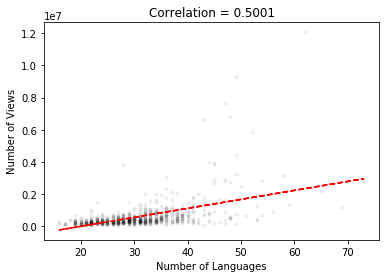

In [33]:
#showing correlation between number of views and number of languages
plt.plot(langviewdf['Number_of_Languages'], langviewdf['VIEWS'], 'k.', alpha=0.05)
x=langviewdf['Number_of_Languages']
y=langviewdf['VIEWS']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Number of Languages')
plt.ylabel('Number of Views')
plt.title('Correlation = %.4f' % langviewdf['Number_of_Languages'].corr(langviewdf['VIEWS']));

Our main aim through this project is to increase the views on TED talks and make them more famous. Hence, we want to figure out factors that effect this. We wanted to knonw whether or not publishing the video of a talk in multiple languages will increase the number of views or not. We found out that it will increase the number of views i.e as the number of languages a video is published in increases, so does the number of views.

### 4.  What are the most frequently used words in each speech? What are the most frequently used noun in each speech?

In [34]:
#word tokenization
text_data = TED_data1.iloc[0]['transcript']
text_data = text_data.lower()
text_data = re.sub('[,()]', '', text_data)
text_data = word_tokenize(text_data)

In [35]:
def check_re(pat, S):
    return bool(re.search(pat, S))
meaningful_words = [word for word in text_data if word not in stopwords.words('english') if word != "he's"]


In [36]:
meaningful_words = [word for word in meaningful_words if not check_re('[^a-z]', word)]


In [37]:
#found topmost meaningful words
fd = FreqDist(meaningful_words)
top_meaningful_words=pd.DataFrame(fd.most_common(20))
top_meaningful_words.rename(columns={0: 'Word',1:'Count'})

,Word,Count
0,right,20
1,teenagers,13
2,car,12
3,see,11
4,one,10
5,saw,10
6,know,10
7,could,10
8,judge,9
9,first,9


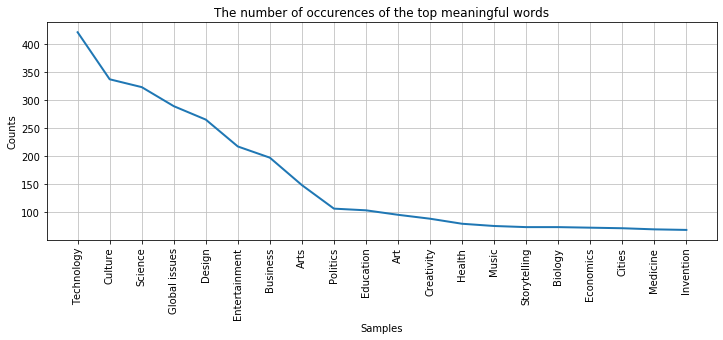

In [49]:
plt.figure(figsize=(12,4))
plt.title('The number of occurences of the top meaningful words')
fd.plot(20)

In [39]:
#finding topmost meaningful nouns
nouns = [x.name().split('.', 1)[0] for x in wn.all_synsets('n')]
meaningful_words_noun = [word for word in meaningful_words if word in nouns]

In [40]:
count_noun_words = FreqDist(meaningful_words_noun)
count_noun_words=pd.DataFrame(count_noun_words.most_common(20))
count_noun_words.rename(columns={0: 'Noun',1:'Count'})

,Noun,Count
0,right,20
1,car,12
2,see,11
3,one,10
4,saw,10
5,know,10
6,judge,9
7,first,9
8,time,8
9,shooting,7


We have made use of NLP(Natural Language Processing) to figure out the most commonly used meaningful words used in a TED talk and also the most commonly used nouns in a TED talk. From the result, we found that the most frequently used noun is right. The most frequently used meaningful word is right too.

### 5. How the average number of views and the maximum of views change with time?

In [45]:
view_with_date_max = TED_data1.groupby(by='film_date')['views'].max()
view_with_date_max = view_with_date_max.to_frame()
view_with_date_mean = TED_data1.groupby(by='film_date')['views'].mean()
view_with_date_mean = view_with_date_mean.to_frame()

Text(0.5, 1.0, 'Change in the number of maximum and mean views by month')

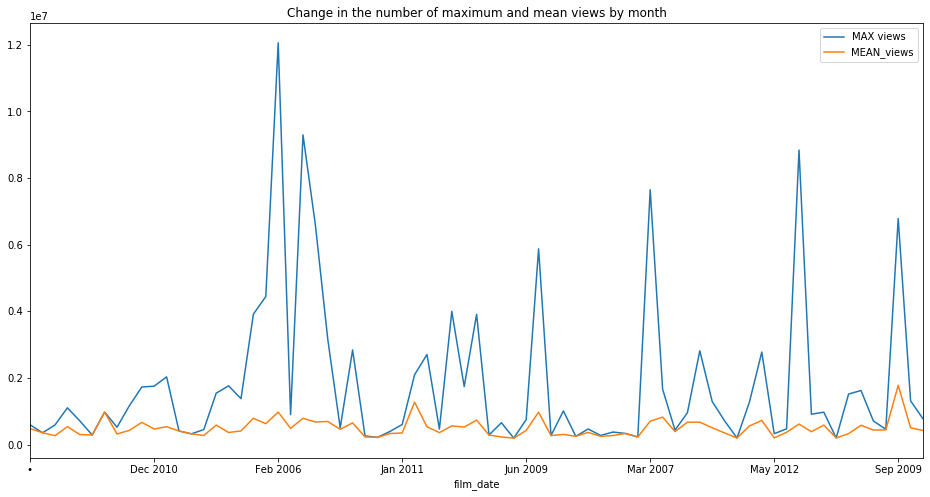

In [46]:
view_with_date_max['views'].plot(figsize=(16,8))
view_with_date_mean['views'].plot()
plt.legend(('MAX views','MEAN_views'));
plt.title('Change in the number of maximum and mean views by month')

Text(0.5, 1.0, 'Change in the number of maximum and mean views by month(Smoothening included)')

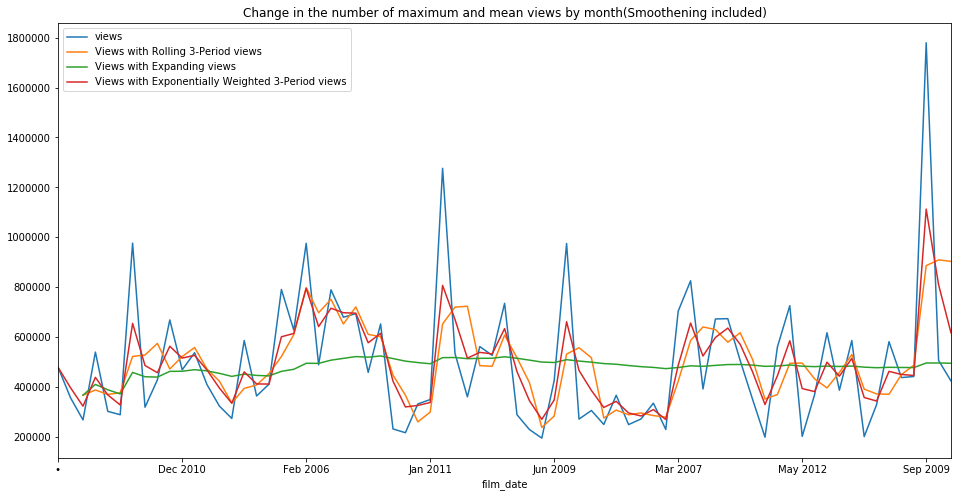

In [47]:
view_with_date_mean['views'].plot(figsize=(16,8))
view_with_date_mean['views'].rolling(3).mean().plot()
view_with_date_mean['views'].expanding(3).mean().plot()
view_with_date_mean['views'].ewm(span=3).mean().plot()
plt.legend(('views','Views with Rolling 3-Period views','Views with Expanding views','Views with Exponentially Weighted 3-Period views'))
plt.title('Change in the number of maximum and mean views by month(Smoothening included)')

Text(0.5, 1.0, 'Change in the number of maximum and mean views by year')

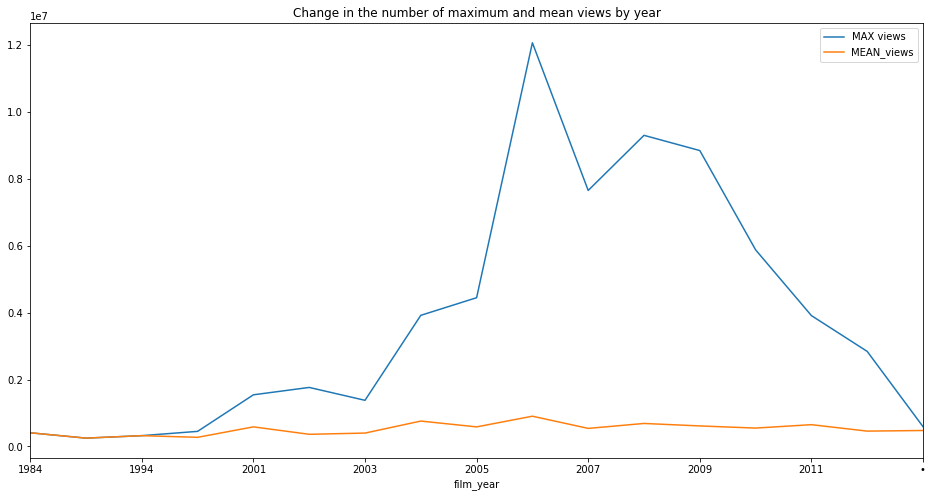

In [48]:
view_with_date_max = TED_data2.groupby(by='film_year')['views'].max()
view_with_date_max = view_with_date_max.to_frame()
view_with_date_mean = TED_data2.groupby(by='film_year')['views'].mean()
view_with_date_mean = view_with_date_mean.to_frame()
view_with_date_max['views'].plot(figsize=(16,8))
view_with_date_mean['views'].plot()
plt.legend(('MAX views','MEAN_views'));
plt.title('Change in the number of maximum and mean views by year')

We showed how the number of views change over time, we show maximum views as well as the mean views. We have also used smoothing to show it better and take in consideration all factors. From the picture, we observe that there is no obvious tendency in number of views. The overall trend is stable.